# Método da bisseção
***

Iniciamos a nossa discussão com o método da bisseção pois este se trata de uma versão mais sofisticada do raciocínio que fizemos anteriormente.

* Começamos mudando ligeiramente o nosso problema.


* Ao invés de encontrar o valor de x para o qual $f(x) = y_0$, passamos $y_0$ para o lado esquerdo da igualdade e buscamos o valor de $x$ para o qual $g(x) = f(x) - y_0 = 0$.


* Em matemática este problema é conhecido como encontrar o zero de uma função.


* É lógico que é trivial transformar um problema em que buscamos $x$ que produz um valor arbitrário (ex.: 42) em um problema de zero de funções. Utilizar o zero, no entanto, simplifica alguns cálculos.

***
### Exemplos
***

Importa as bibliotecas

In [1]:
import numpy
import matplotlib.pyplot as matplot
%matplotlib inline

***

Definimos a nossa função $f(x) = x^2 + 2x + 1$ e o valor de $y_0$

Queremos encontrar o valor de $x$ para o qual $f(x) = y_0$

In [2]:
def f(x):
    return x*x + 2*x + 1

y0 = 42

***

Cria uma sequência de números começando em $0$ e terminando em $10$ e inserir os resultados de $f(x)$ em y

In [3]:
x = numpy.linspace(0, 10)
y = f(x)

***

Definimos $g(x)$, a função que queremos encontrar os zeros

In [4]:
def g(x):
    return f(x) - y0

***

O método da bisseção, assim como o método de força bruta mostrado anteriormente, exige um intervalo de busca inicial. Este intervalo deve ser escolhido para conter o zero da função e deve conter um valor para o qual $g(x)$ seja positivo e outro valor para o qual $g(x)$ seja negativo. Chamamos estes valores de $x_a$ e $x_b$. Pois pelo **teorema de Bolzano** $f(a)\times f(b) < 0$ então existe pelo menos uma raiz entre $a$ e $b$

Nosso intervalo de busca inicial é entre $0$ e $10$. No método de força bruta, usamos entre $5$ e $6$. Vamos utilizar um intervalo maior só por segurança.

In [5]:
x0 = 0
x1 = 10

***

Verificamos os valores de $g(x)$ para descobrir quem é $x_a$ e $x_b$. No nosso caso sabemos que $x_a = x_0$ e $x_b = x_1$, mas caso a função seja decrescente no intervalo, esta relação se inverte.

In [6]:
if g(x0) < g(x1):
    print("Função é crescente.")
    # xa = Valores de x para que g(x) seja positivo
    # xb = Valores de x para que g(x) seja negativo
    xa = x0
    xb = x1
    ya = g(x0)
    yb = g(x1)
else:
    print("Função é decrescente.")
    # xa = Valores de x para que g(x) seja positivo
    # xb = Valores de x para que g(x) seja negativo
    xa = x1
    xb = x0
    ya = g(x1)
    yb = g(x0)
    
print("g(x0) =", g(x0))
print("g(x1) =", g(x1))

Função é crescente.
g(x0) = -41
g(x1) = 79


***

Fazemos um gráfico dos resultados, vamos plotar o gráfico para cada valor de $x$ um respectivo valor de $y - y_0$ na qual $y_0$ é 42, isso irá permitir que o eixo $y$ fica um pouco acima do inicio do gráfico, além disso temos também uma linha horizontal na qual $y = 0$

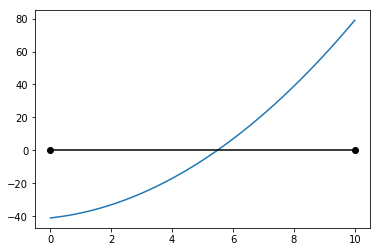

In [7]:
matplot.plot(x, y - y0)
matplot.plot(
    [xa, xb], [0, 0],
    color='black',
    linestyle='-',
    marker='o'
)
matplot.show()

***

O próximo passo consiste em avaliar o valor de g(x) no ponto central do intervalo e investigar qual será o novo intervalo

In [8]:
x_average = (xa + xb) / 2
g_average = g(x_average)
print(g_average)

-6.0


***

Vimos que o valor no ponto médio é igual à -6.0, e portanto negativo. Deste modo, sabemos que o zero de g(x) deve estar entre este valor e xb. Atualizamos nossas variáveis e mostramos o resultado em um gráfico.

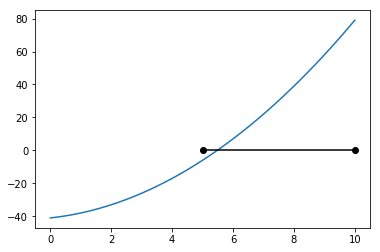

In [9]:
xa = x_average
ga = g_average

matplot.plot(x, y - y0)
matplot.plot([xa, xb], [0, 0], 'ko-')
matplot.show()

***

Vemos que o intervalo reduziu pela metade. Agora repetimos outra vez o mesmo raciocínio.

In [10]:
x_average = (xa + xb) / 2
g_average = g(x_average)
print(g_average)

30.25


***

Observe que desta vez o valor de g(x_average) ficou positivo. Isto significa que devemos substituir $x_b$ e não $x_a$. Novamente, o intervalo de valores aceitáveis para o zero da função reduziu pela metade.

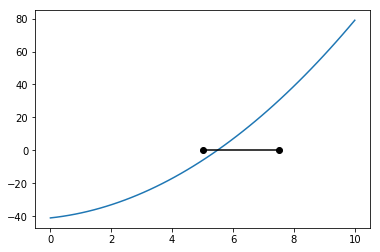

In [11]:
xb = x_average
yb = g_average

matplot.plot(x, y - y0)
matplot.plot([xa, xb], [0, 0], 'ko-')
matplot.show()

***
### Justar tudo em um único passo
***

Agora juntamos o raciocínio realizado nas duas etapas anteriores em um único passo em que o computador decide automaticamente qual dos dois valores ($x_a$ ou $x_b$) deve ser atualizado:

Intervalo: 5.478515625 e 5.4833984375


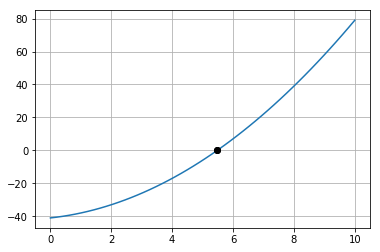

In [20]:
x_average = (xa + xb) / 2
g_average = g(x_average)

if g_average <= 0:
    xa = x_average
    ya = g_average
else:
    xb = x_average
    yb = g_average
    
print("Intervalo:", xa, "e", xb)
matplot.plot(x, y - y0)
matplot.plot([xa, xb], [0, 0], 'ko-')
matplot.grid(True)

Observe que o intervalo aceitável diminui, mas sempre contêm o valor do zero da função. Podemos verificar isto executando várias vezes a célula acima.

É lógico que quanto mais repetições realizarmos, melhor será a estimativa do intervalo da função. Cada repetição reduz o intervalo pela metade. Deste modo, após 10 repetições teríamos um intervalo $2^{10} = 1024$ vezes menor que o intervalo inicial. Nada mal!

***

Não queremos executar a célula acima várias vezes manualmente. Vamos então programar o computador para fazer isto automaticamente.

Vemos que o valor de $x$ converge para $5.4807$... e o valor de $g(x)$ se aproxima de zero. vamos fazer o calculo acompanhando o valor do erro, para depois mostrarmos em um gráfico.

Função é crescente.
 0) centro: 5.000000, g(x): -6.000000
 1) centro: 7.500000, g(x): 30.250000
 2) centro: 6.250000, g(x): 10.562500
 3) centro: 5.625000, g(x):  1.890625
 4) centro: 5.312500, g(x): -2.152344
 5) centro: 5.468750, g(x): -0.155273
 6) centro: 5.546875, g(x):  0.861572
 7) centro: 5.507812, g(x):  0.351624
 8) centro: 5.488281, g(x):  0.097794
 9) centro: 5.478516, g(x): -0.028835
10) centro: 5.483398, g(x):  0.034455
11) centro: 5.480957, g(x):  0.002804
12) centro: 5.479736, g(x): -0.013017
13) centro: 5.480347, g(x): -0.005107
14) centro: 5.480652, g(x): -0.001152
15) centro: 5.480804, g(x):  0.000826
16) centro: 5.480728, g(x): -0.000163
17) centro: 5.480766, g(x):  0.000332
18) centro: 5.480747, g(x):  0.000085
19) centro: 5.480738, g(x): -0.000039


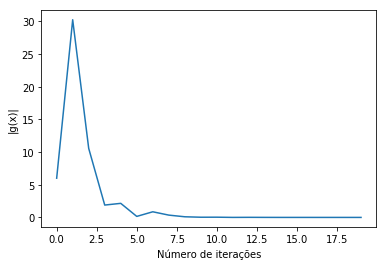

In [21]:
# Reseta o intervalo inicial
x0, x1 = 0, 10

# Calcula xa/ya e xb/yb
if g(x0) < g(x1):
    print("Função é crescente.")
    xa, xb = x0, x1
    ya, yb = g(x0), g(x1)
else:
    print("Função é decrescente.")
    xa, xb = x1, x0
    ya, yb = g(x1), g(x0)
    
# Atualiza 20 vezes o intervalo
g_result = []
for i in range(20):
    x_average = (xa + xb) / 2
    g_average = g(x_average)
    if g_average <= 0:
        xa, ya = x_average, g_average
    else:
        xb, yb = x_average, g_average
        
    g_result.append(abs(g_average))
        
    print("%2d) centro: %.6f, g(x): %9.6f" % (i, x_average, g_average))
    
matplot.plot(g_result)
matplot.xlabel('Número de iterações')
matplot.ylabel('|g(x)|')
matplot.show()

Percebe-se que o erro começou a tender a zero a partir da oitava iteração

***
### Critério de parada
***

Vimos no gráfico anterior que o erro claramente reduz com o número de iterações. Mas quantas iterações devemos realizar? A resposta é sempre "depende".

O método da bisseção, assim como vários outros métodos numéricos atinge a resposta correta apenas após um número infinito de iterações. Se por um lado é impossível esperar estas infinitas iterações, por outro, raramente precisamos do valor "completo" da solução com todas suas infinitas casas decimais. Na prática precisamos apenas de um valor "próximo o suficiente" do correto e é lógico que o que é "suficiente" depende muito da aplicação.

No método da bisseção escolhemos tipicamente dois critérios para definir o que é "bom o suficiente". Eles se traduzem em uma margem de tolerância para $y$ ou para $x$.

* $|g(x)| < y_{tol}$
* $|x_b - x_a| < x_{tol}$

Tipicamente, paramos quando um dos dois critérios for atingido. É lógico que podemos também adotar apenas um dos dois critérios ou, se quisermos ser mais rigorosos, paramos apenas quando os dois critérios forem atingidos. O código abaixo implementa a bisseção com o critério de parada.

No nosso caso colocarmos o critério de parada como $1 \times 10^\left(-6\right)$

In [22]:
# Definir tolerâncias = 1x10^(-6)
x_tolerance = 1e-6
y_tolerance = 1e-6

# Reseta o intervalo inicial
x0, x1 = 0, 10

# Calcula xa/ya e xb/yb
if g(x0) < g(x1):
    xa, xb = x0, x1
    ya, yb = g(x0), g(x1)
else:
    xa, xb = x1, x0
    ya, yb = g(x1), g(x0)
    
# Atualiza o intervalo até atingir o critério de parada
iterations = 0
while True:
    iterations += 1
    x_average = (xa + xb) / 2
    g_average = g(x_average)
    if g_average <= 0:
        xa, ya = x_average, g_average
    else:
        xb, yb = x_average, g_average
        
    if abs(xb - xa) < x_tolerance or abs(g_average) < y_tolerance:
        break

***

Verificamos o resultado

In [23]:
x_average = (xa + xb) / 2
print("Número de iterações: %s" % iterations)
print("xa = %.7f, xb = %.7f" % (xa, xb))
print("Meio do intervalo: %.7f" % x_average)
print("g(x) no meio do intervalo: %.7f" % g(x_average))

Número de iterações: 24
xa = 5.4807407, xb = 5.4807413
Meio do intervalo: 5.4807410
g(x) no meio do intervalo: 0.0000034


***
### Criando uma função
***

Seria bom reutilizarmos a lógica do método da bisseção com qualquer função arbitrária, não? Isto é fácil fazer em Python. Vamos criar uma função que recebe uma funçao $g$ e um intervalo $x_0$, $x_1$ e a partir disto calcula o zero de $g(x)$ contido neste intervalo.

In [24]:
def bissect(g, x0, x1, x_tolerance=1e-6, y_tolerance=1e-6):
    """
    Calcula o zero de g(x) dentro do intervalo (x0, y0)
    
    Argumentos:
    
        g: um função de um única variável
        x0, x1: intervalo inicial para a busca do zero de g(x)
        x_tolerance: tolerância em x (retorna quando o intervalo for menor que x_tolerance)
        y_tolerance: tolerância em y (retorna quando |g(x)| < y_tolerance)
        
    Retornos:
    
        Retorna o zero da função g(x) (valor de x em que g(x) = 0)
    """
    
    # Calcula xa/ya e xb/yb
    # xa = Valores de x para que g(x) seja positivo -> g(xa) = ya
    # xb = Valores de x para que g(x) seja negativo -> g(xb) = yb
    if g(x0) < g(x1):
        # Função é crescente
        xa, xb = x0, x1
        ya, yb = g(x0), g(x1)
    else:
        # Função é decrescente
        xa, xb = x1, x0
        ya, yb = g(x1), g(x0)
        
    # Atualiza o intervalo até atingir o critério de parada
    iterations = 0
    while True:
        iterations += 1
        x_average = (xa + xb) / 2
        g_average = g(x_average)
        
        # Se o ponto médio de y (g_average) for negativo substituimos o xa/ya caso contrario xb/yb
        # Deste modo, sabemos que o zero de g(x) deve estar entre os novos xa e xb.
        if g_average < 0:
            xa, ya = x_average, g_average
        elif g_average > 0:
            xb, yb = x_average, g_average
        else:
            return x_average
        
        # Critério de parada: |xb - xa| < tolerancia em x ou |g(x)| < tolerancia em y
        if abs(xb - xa) < x_tolerance or abs(g_average) < y_tolerance:
            break
    
    # Retorna o ponto em que g(x) é praticamente zero
    if abs(ya) < abs(yb):
        return xa
    else:
        return xb

***

Agora vamos usar a função

***

In [25]:
# Encontra o zero da função g(x)
print("x =", bissect(g, 0, 10))

x = 5.480740666389465


***

In [26]:
# Acha o zero da função cos(x) no intervalo de 0 a 4 (pi/2)
print("x =", bissect(numpy.cos, 0, 4))

x = 1.5707969665527344


***

In [27]:
# Encontre o ponto onde cos(x) é igual a 0.5 no intervalo de 0 a 4
def g2(x):
    return numpy.cos(x) - 0.5

print("x =", bissect(g2, 0, 4))

x = 1.0471973419189453


***

In [28]:
# Encontra o ponto onde cos(x) é igual a sin(x) no intervalo de 0 a 4
# Sabemos que a resposta é pi/4
def g3(x):
    return numpy.cos(x) - numpy.sin(x)

print("x =", bissect(g3, 0, 4))

x = 0.7853984832763672
